In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Play.csv')

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      10 non-null     object
 1   Temperature  10 non-null     object
 2   Humidity     10 non-null     object
 3   Wind         10 non-null     object
 4   PlayTennis   10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes


In [ ]:
df.describe()

,Outlook,Temperature,Humidity,Wind,PlayTennis
count,10,10,10,10,10
unique,3,3,2,2,2
top,Sunny,Cool,High,Weak,Yes
freq,4,4,5,7,6


<BarContainer object of 10 artists>

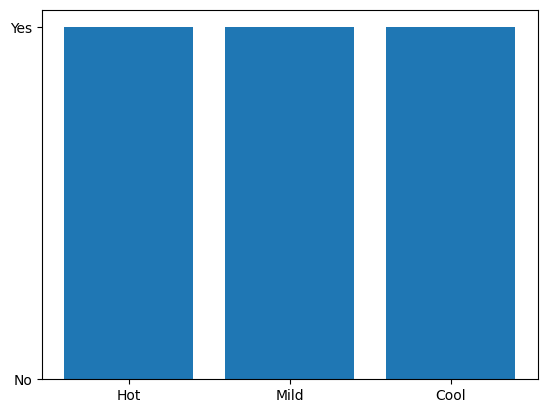

In [ ]:
x=df['Temperature']
y=df['PlayTennis']
plt.bar(x,y)

In [ ]:
X =df.drop('PlayTennis',axis=1)
y=df['PlayTennis']
X

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [ ]:
encoder = OrdinalEncoder()
x = encoder.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
x

array([[2., 1., 0., 1.],
       [2., 1., 0., 0.],
       [0., 1., 0., 1.],
       [1., 2., 0., 1.],
       [1., 0., 1., 1.],
       [1., 0., 1., 0.],
       [0., 0., 1., 0.],
       [2., 2., 0., 1.],
       [2., 0., 1., 1.],
       [1., 2., 1., 1.]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = CategoricalNB()
model.fit(x_train,y_train)

CategoricalNB()

In [ ]:
test_weather =[[2], [1],[0],[1]]
predicted_y = model.predict(np.array(test_weather).reshape(1, -1))
print("Predicted output: ",predicted_y)

Predicted output:  [0]


In [ ]:
play_encoder = LabelEncoder().fit(df['PlayTennis'])
result = play_encoder.inverse_transform(predicted_y)
print("Predicted output after inverse transform: ", result)

Predicted output after inverse transform:  ['No']


In [ ]:
print(f"""Tested output:
      Weather: {test_weather[0]} - Play: {result[0]}""")

Tested output:
      Weather: [2] - Play: No


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,model.predict(x_test))

0.5

In [ ]:
confusion_matrix(y_test,model.predict(x_test))

array([[1, 0],
       [1, 0]])